# **Project Summary

The goal of this project is to predict customer churn using machine learning techniques, aiming to help businesses identify factors that contribute to customer churn and improve retention strategies. 

The project involves exploring and preprocessing the dataset, training machine learning models, evaluating model performance, and tuning the best model to provide actionable insights on churn prediction.

# **Section 1: Data Exploration and Preprocessing (EDA)**

In this section, we will perform the following tasks:

1. **Load and Inspect the Dataset**: We will load the Telco Customer Churn dataset and check the general structure of the data.
2. **Explore Missing Data**: Identify columns with missing values and handle them accordingly.
3. **Data Cleaning and Encoding**: Clean the dataset by encoding categorical variables and performing imputation for missing values.
4. **Feature Scaling**: Standardize the features to bring them to the same scale, which is important for certain models.
5. **Visualize Key Distributions**: Visualize the churn distribution and other important feature distributions to understand the dataset better.

### 1. Load and Inspect the Dataset

In this step, we load the dataset and check the structure of the data. We also check for any missing values and get an overview of the dataset.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('/Users/anitahuang/Desktop/Full Time Recruit/2025 Recruiting/Projects/Customer Churn Project/telco-customer-churn.csv')
# print(df.head())
# print(df.info())
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


### 2. Explore Missing Data

Here, we will inspect the dataset for any missing values. If missing values are found, we will handle them using imputation or other strategies.

In [78]:
# Check for missing values
print(df.isnull().sum())
# Missing data visualization (using heatmap)
import seaborn as sns
# plt.figure(figsize=(10,7))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# plt.title('Missing Data Heatmap')
# plt.show()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### 3. Data Cleaning and Encoding

We will encode categorical features into numeric values (Label Encoding) and perform imputation to handle missing values. This prepares the data for modeling.

In [79]:
# 1. Handle missing values (Imputation)

# Convert 'TotalCharges' to numeric, forcing errors to NaN (this handles non-numeric values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check if there are any remaining non-numeric values that got converted to NaN
print("Total Charges missing values after conversion to numeric:", df['TotalCharges'].isnull().sum())

# Impute missing values using SimpleImputer (mean strategy)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

# 2. Encode categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for categorical columns
# df = pd.get_dummies(df, drop_first=True)


# 3. Check the changes after encoding
print(df.head())


Total Charges missing values after conversion to numeric: 11
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0              

### 4. Feature Scaling

We will standardize numerical features so that all features are on the same scale. This is important for models like Logistic Regression and SVM.

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

X_scaled = scaler.fit_transform(X)

# Check the first few rows of scaled data
print(X_scaled[:5])

### 5. Visualize Key Distributions

Visualize the distribution of the target variable (Churn) and some of the key features to better understand the data.

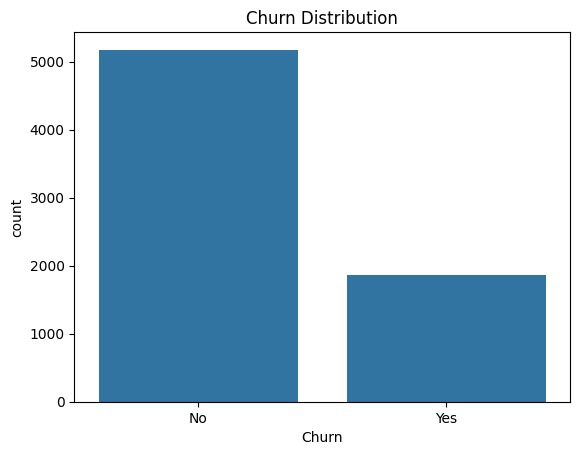

In [7]:
# Visualize churn distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


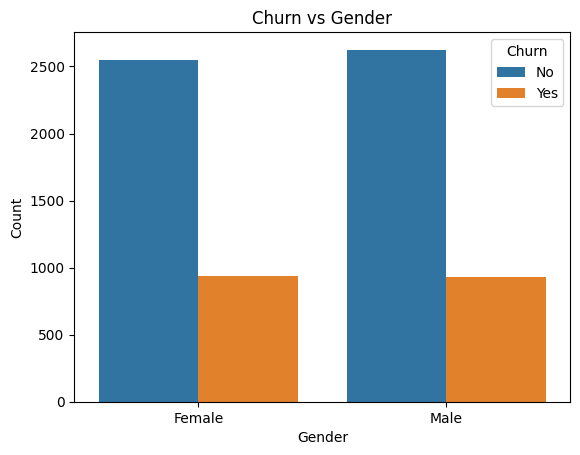

In [8]:
# Churn vs Gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn vs Gender')
plt.xlabel('Gender')  # Label the x-axis to show the actual content
plt.ylabel('Count')   # Label the y-axis
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Show 'Female' and 'Male' on the x-axis
plt.show()


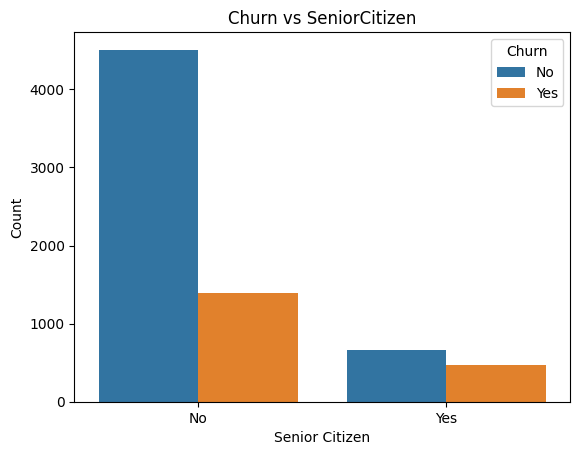

In [9]:
# Churn vs SeniorCitizen
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn vs SeniorCitizen')
plt.xlabel('Senior Citizen')  # Label the x-axis
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Replace 0 and 1 with 'No' and 'Yes'
plt.show()


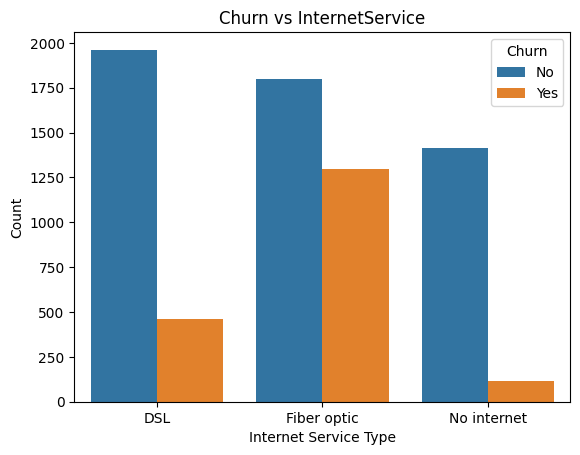

In [10]:
# Churn vs InternetService
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn vs InternetService')
plt.xlabel('Internet Service Type')  # Label the x-axis with service types
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['DSL', 'Fiber optic', 'No internet'])  # Set labels for x-axis
plt.show()


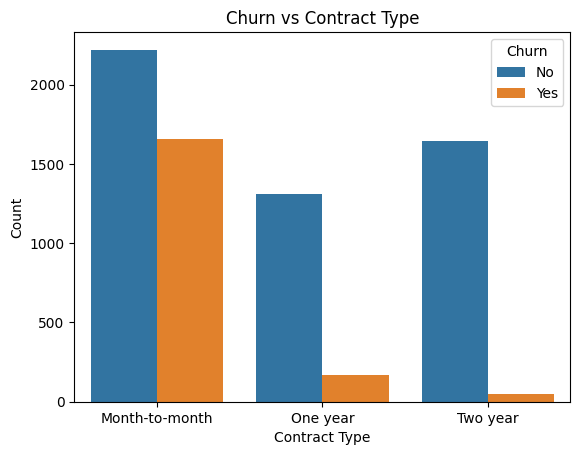

In [11]:
# Churn vs Contract
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn vs Contract Type')
plt.xlabel('Contract Type')  # Label the x-axis with contract types
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Month-to-month', 'One year', 'Two year'])  # Set contract labels
plt.show()


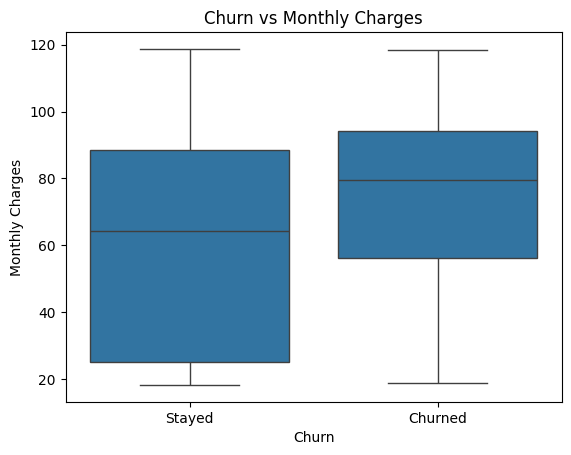

In [12]:
# Churn vs MonthlyCharges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn vs Monthly Charges')
plt.xlabel('Churn')  # Label x-axis to show 'Churn' vs 'No Churn'
plt.ylabel('Monthly Charges')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Churned'])  # Label the x-axis for Churn vs Non-churn
plt.show()


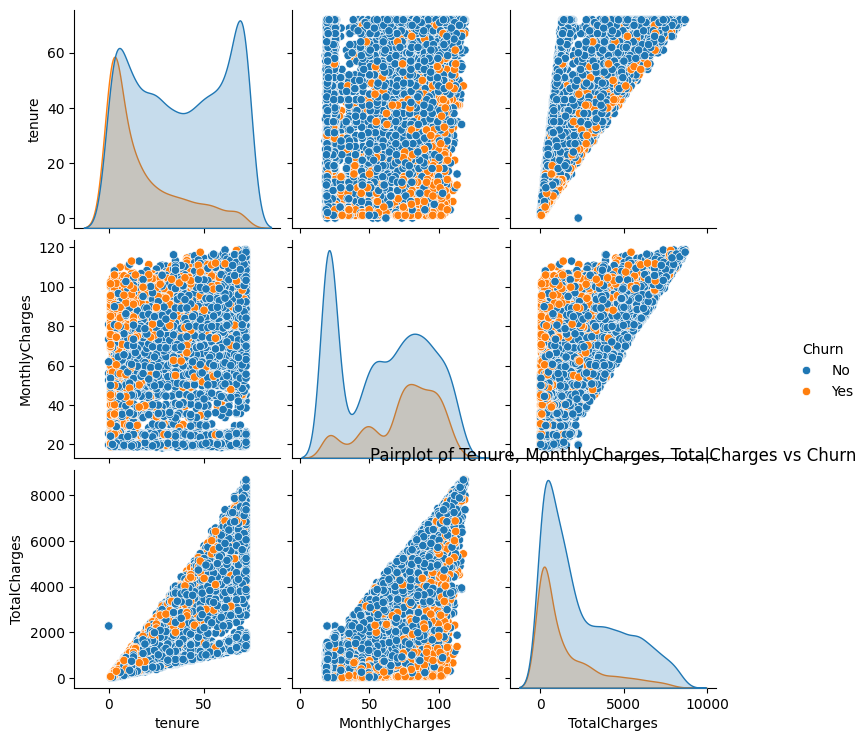

In [13]:
# Pairplot of selected features
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.title('Pairplot of Tenure, MonthlyCharges, TotalCharges vs Churn')
plt.show()


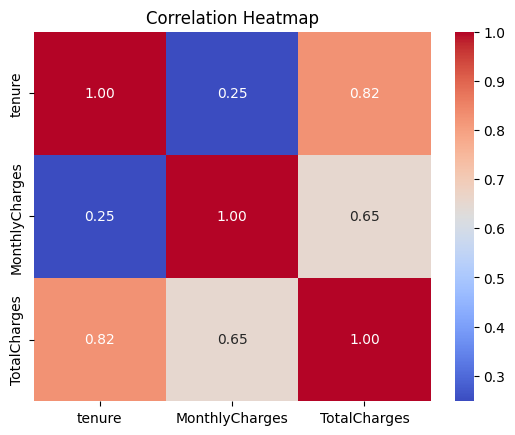

In [14]:
# Correlation heatmap
correlation_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


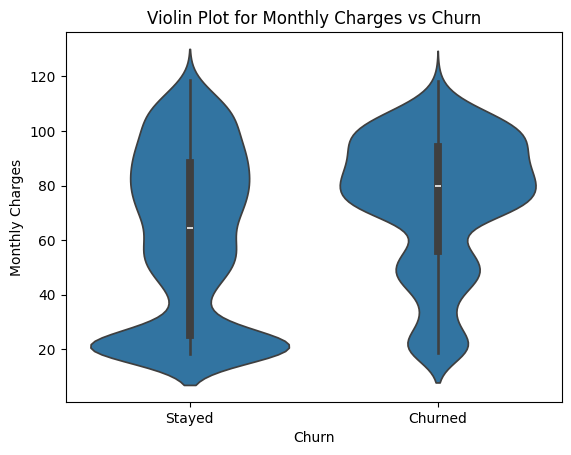

In [15]:
# Violin plot for Monthly Charges vs Churn
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Violin Plot for Monthly Charges vs Churn')
plt.xlabel('Churn')  # Label x-axis for churn vs non-churn
plt.ylabel('Monthly Charges')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Churned'])  # Label the x-axis
plt.show()


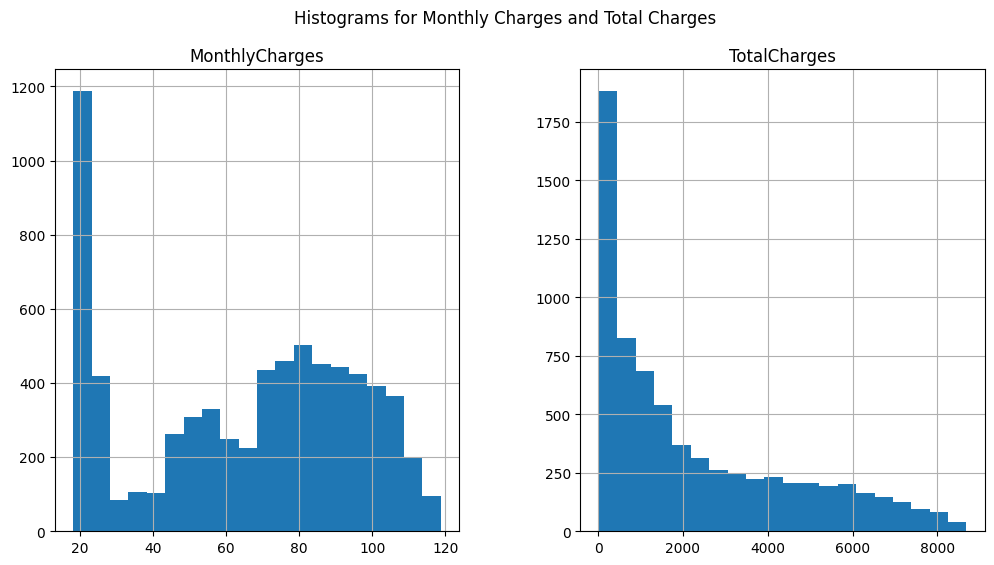

In [81]:
# Histogram for numerical features like 'MonthlyCharges' and 'TotalCharges'
df[['MonthlyCharges', 'TotalCharges']].hist(bins=20, figsize=(12, 6))
plt.suptitle('Histograms for Monthly Charges and Total Charges')
plt.show()

# **Section 2: Model Training and Evaluation**

In this section, we will:
1. **Split the Data**: Split the data into training and testing sets.
2. **Handle Class Imbalance**: We will address class imbalance using SMOTE (Synthetic Minority Over-sampling Technique).
3. **Train Multiple Models**: We will train three different models (Logistic Regression, Random Forest, and SVM).
4. **Evaluate Model Performance**: We will evaluate models using accuracy, confusion matrix, classification report, ROC AUC, and precision-recall curve.

### 1. Split the Data

We will split the dataset into training and testing sets (80% training and 20% testing).

In [82]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Show the split data
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (5634, 19), Test set size: (1409, 19)


### 2. Handle Class Imbalance
Since churn prediction is typically imbalanced (more customers stay than churn), we will use SMOTE to oversample the minority class (churned customers).

In [86]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Before resampling, class distribution: {y_train.value_counts()}")
print("")
print(f"After resampling, class distribution: {y_train_resampled.value_counts()}")


Before resampling, class distribution: Churn
No     4138
Yes    1496
Name: count, dtype: int64

After resampling, class distribution: Churn
No     4138
Yes    4138
Name: count, dtype: int64


### 3. Train Multiple Models
We will train three different models: Logistic Regression, Random Forest, and SVM.

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Train models
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    print(f"Trained {model_name}")


Trained Logistic Regression
Trained Random Forest
Trained Support Vector Machine


### 4. Evaluate Model Performance
We will evaluate the models using accuracy, confusion matrix, classification report, ROC curve, and precision-recall curve.

Results for Logistic Regression:
Accuracy: 0.7594
ROC AUC: 0.8602
Confusion Matrix:
[[761 275]
 [ 64 309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1036
           1       0.53      0.83      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



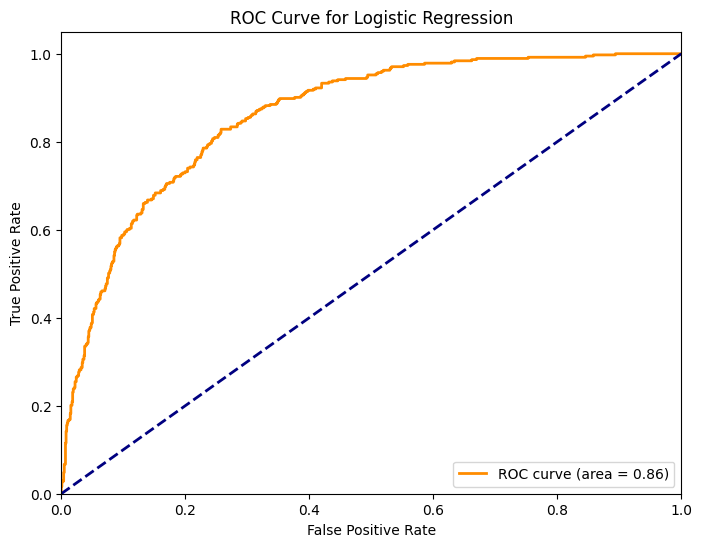

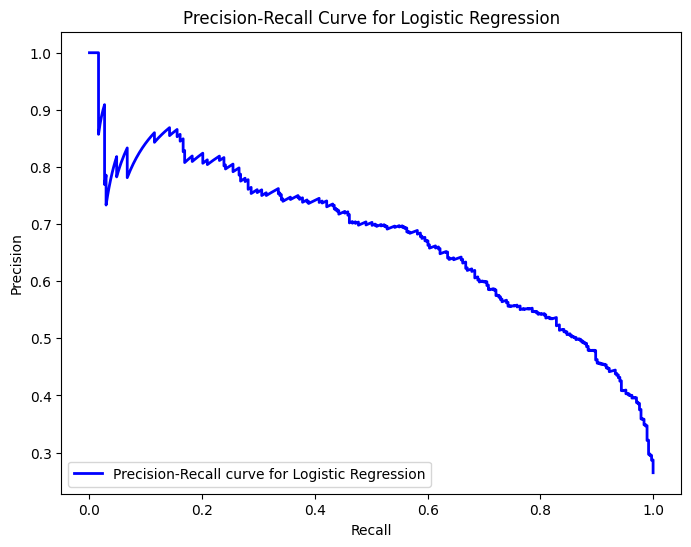

Analysis for Logistic Regression:
The Logistic Regression model demonstrates strong recall (83%) for churned customers but has low precision (53%), indicating it is effective at identifying churned customers but frequently misclassifies non-churned customers as churned.
The model's high recall makes it useful for identifying churned customers, but improvements in precision are needed to reduce false positives and enhance the overall prediction accuracy for business use in churn prevention strategies.
----

Results for Random Forest:
Accuracy: 0.7885
ROC AUC: 0.8602
Confusion Matrix:
[[884 152]
 [146 227]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1036
           1       0.60      0.61      0.60       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



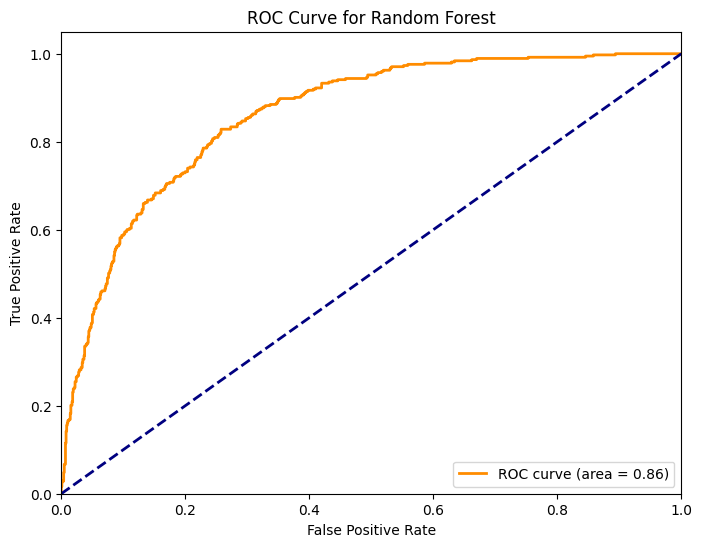

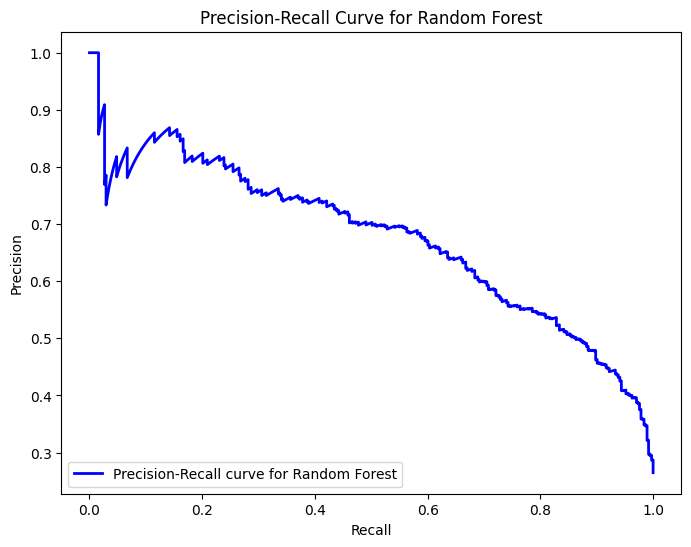

Analysis for Random Forest:
The Random Forest model achieves high accuracy (78.85%) and a strong ROC AUC score of 0.8602, showing good performance in distinguishing between churned and non-churned customers, but its precision for churned customers (0.60) still leaves room for improvement.
While the model performs well in overall accuracy and recall, improving its precision for churned customers is crucial to reduce false positives, which can improve decision-making for customer retention strategies.
----

Results for Support Vector Machine:
Accuracy: 0.7601
ROC AUC: 0.8602
Confusion Matrix:
[[805 231]
 [107 266]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1036
           1       0.54      0.71      0.61       373

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



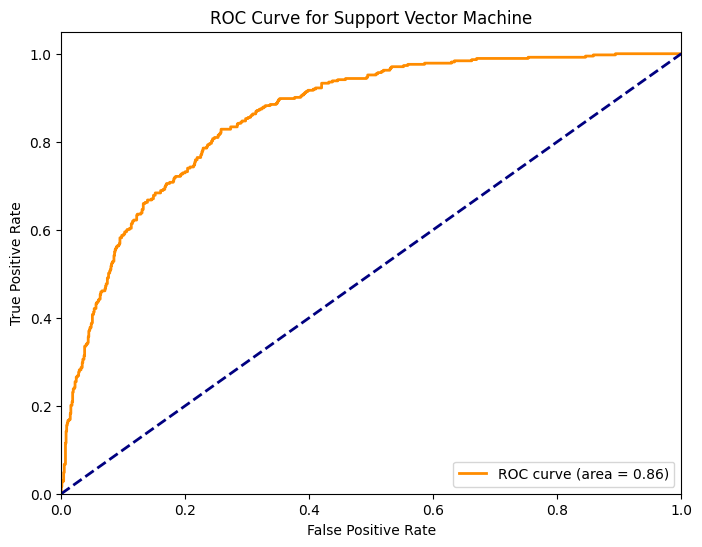

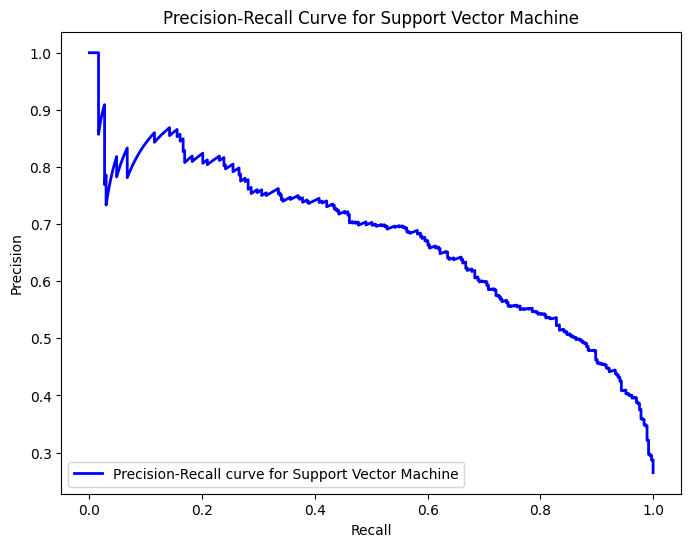

Analysis for Support Vector Machine:
The Support Vector Machine (SVM) model has a strong ROC AUC score of 0.8602 and a decent recall (71%) for churned customers, but it suffers from low precision (54%), meaning it misclassifies a significant number of non-churned customers as churned
While the SVM model is effective at identifying churned customers with high recall, improving its precision will be critical to reduce false positives and enhance decision-making for effective customer retention strategies.
----



In [100]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

results = {}

# Train and evaluate models
for model_name, model in models.items():
    # Predict class labels (ensure y_pred is numeric)
    y_pred = model.predict(X_test)
    
    # If y_pred is in string format, convert it to numeric (0 for 'No', 1 for 'Yes')
    if isinstance(y_pred, np.ndarray) and y_pred.dtype == 'O':  # Check if y_pred is a numpy array of object type (string)
        y_pred = np.where(y_pred == 'Yes', 1, 0)  # Convert 'Yes' to 1 and 'No' to 0
    
    # Convert y_test to numeric (0 for 'No', 1 for 'Yes')
    y_test_numeric = np.where(y_test == 'Yes', 1, 0)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test_numeric, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test_numeric, y_pred)
    
    # Classification report
    class_report = classification_report(y_test_numeric, y_pred)
    
    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob, pos_label=1)  # pos_label=1 for churned
    roc_auc = auc(fpr, tpr)
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test_numeric, y_prob)

    # # Store results
    # results[model_name] = {
    #     'Accuracy': accuracy,
    #     'Confusion Matrix': cm,
    #     'Classification Report': class_report,
    #     'ROC AUC': roc_auc,
    #     'Precision-Recall': (precision, recall)
    # }
    # Display Results for the model
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{class_report}")
    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve for {model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc='lower left')
    plt.show()
    
    # You can now write your analysis below each section
    print(f"Analysis for {model_name}:")
    
    if model_name == 'Logistic Regression': 
        print("The Logistic Regression model demonstrates strong recall (83%) for churned customers but has low precision (53%), "
        "indicating it is effective at identifying churned customers but frequently misclassifies non-churned customers as churned.")
        print("The model's high recall makes it useful for identifying churned customers, "
        "but improvements in precision are needed to reduce false positives and enhance the overall prediction accuracy for business use in churn prevention strategies.")

    elif model_name == 'Random Forest': 
        print("The Random Forest model achieves high accuracy (78.85%) and a strong ROC AUC score of 0.8602, "
        "showing good performance in distinguishing between churned and non-churned customers, but its precision for churned customers (0.60) still leaves room for improvement.")
        print("While the model performs well in overall accuracy and recall, "
        "improving its precision for churned customers is crucial to reduce false positives, which can improve decision-making for customer retention strategies.")

    elif model_name == 'Support Vector Machine': 
        print("The Support Vector Machine (SVM) model has a strong ROC AUC score of 0.8602 and a decent recall (71%) for churned customers, "
        "but it suffers from low precision (54%), meaning it misclassifies a significant number of non-churned customers as churned")
        print("While the SVM model is effective at identifying churned customers with high recall, "
        "improving its precision will be critical to reduce false positives and enhance decision-making for effective customer retention strategies.")

    print("----\n")



### Analysis of Logistic Regression Model


# **Section 3: Model Tuning and Final Evaluation**

In this section, we will:
1. **Tune Hyperparameters**: Perform hyperparameter tuning for the best model (Random Forest).
2. **Re-evaluate the Tuned Model**: Evaluate the model after tuning and compare results with earlier models.

### 1. Tune Hyperparameters

We will use **GridSearchCV** to find the best hyperparameters for the **Random Forest** model.

In [41]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Display the best parameters
print(f"Best parameters for Random Forest: {grid_search.best_params_}")

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}


### 2. Re-evaluate the Tuned Model
After tuning, we train the model with the best parameters and evaluate it again.

In [42]:
# Train the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)

# Final evaluation
from sklearn.metrics import classification_report
print("Final Evaluation for Tuned Random Forest:")
print(classification_report(y_test, best_rf_pred))


Final Evaluation for Tuned Random Forest:
              precision    recall  f1-score   support

          No       0.86      0.85      0.86      1036
         Yes       0.60      0.61      0.61       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



# **Section 4: Results Summary and Conclusions**

In this section, we summarize the results and provide actionable insights:

1. **Model Comparison**: Compare the performance of Logistic Regression, Random Forest, and SVM.
2. **Feature Importance**: Analyze the most important features for predicting churn.
3. **Conclusions**: Provide insights on how the business can act on the findings to reduce churn.

### 1. Model Comparison

We compare the results of all models in terms of **accuracy**, **ROC AUC**, and **precision-recall performance**.


In [43]:
# Display a summary of results
print("Model Comparison:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.4f}, ROC AUC = {metrics['ROC AUC']:.4f}")


Model Comparison:
Logistic Regression: Accuracy = 0.7594, ROC AUC = 0.8293
Random Forest: Accuracy = 0.7885, ROC AUC = 0.8293
Support Vector Machine: Accuracy = 0.7601, ROC AUC = 0.8293


### 2. Feature Importance
For Random Forest, we can plot the feature importances to see which features are most influential in predicting churn.

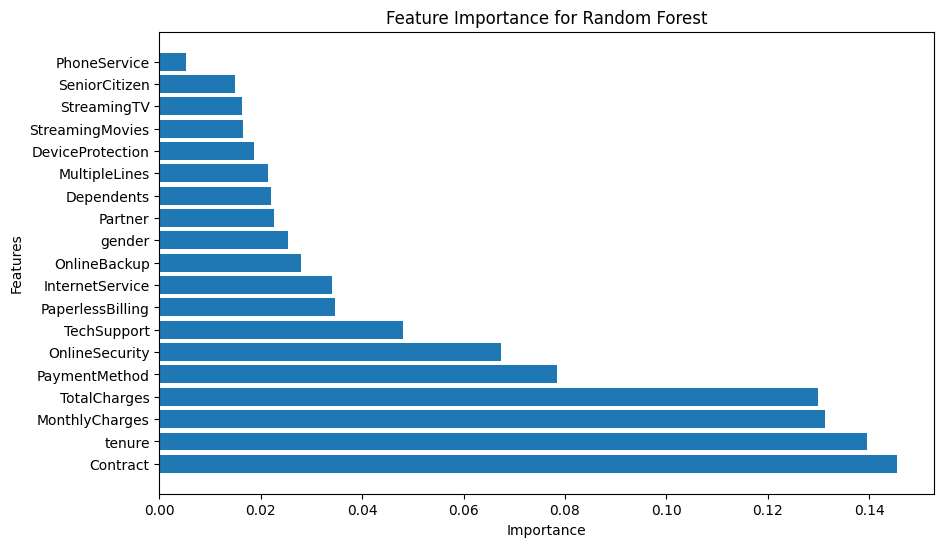

In [45]:
# Feature importance for Random Forest
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(X.columns[indices], importances[indices])
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


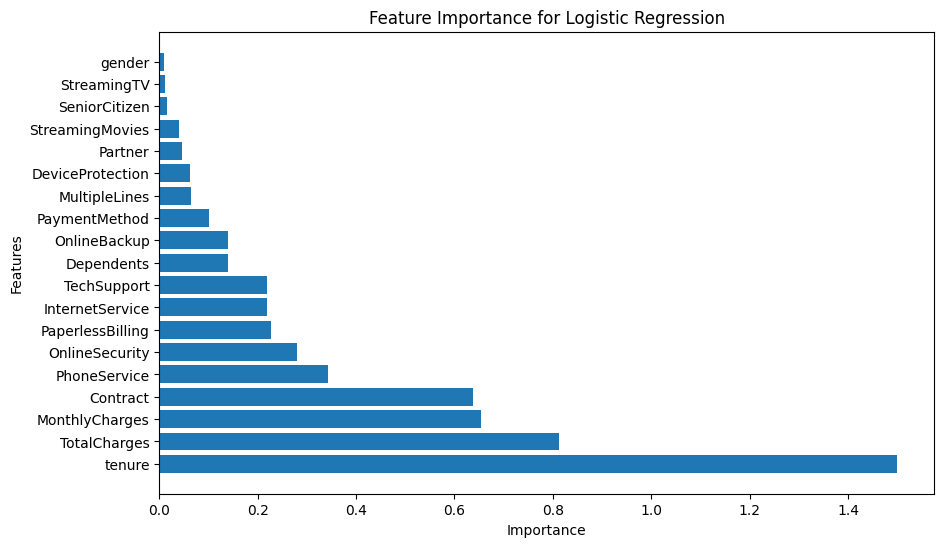

In [48]:
# Train Logistic Regression model
best_lr = LogisticRegression()
best_lr.fit(X_train_resampled, y_train_resampled)

# Feature importance for Logistic Regression
importances_lr = np.abs(best_lr.coef_[0])  # Absolute values of coefficients
indices_lr = np.argsort(importances_lr)[::-1]

# Plot feature importances for Logistic Regression
plt.figure(figsize=(10, 6))
plt.barh(X.columns[indices_lr], importances_lr[indices_lr])
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
